Using set of breast cancer data, create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed?

In [10]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

import math

In [11]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                  header=None,
                 names=['ID_number', 'Diagnosis', 
                     'mean_radius','mean_texture', 'mean_perimeter','mean_area','mean_smoothness',
                  'mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal_dimension',
                          'se_radius','se_texture', 'se_perimeter','se_area','se_smoothness',
                  'se_compactness','se_concavity','se_concave points','se_symmetry','se_fractal_dimension',
                          'largest_radius','largest_texture', 'largest_perimeter','largest_area','largest_smoothness',
                  'largest_compactness','largest_concavity','largest_concave points','largest_symmetry','largest_fractal_dimension'])

In [12]:
df.head()

,ID_number,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,largest_radius,largest_texture,largest_perimeter,largest_area,largest_smoothness,largest_compactness,largest_concavity,largest_concave points,largest_symmetry,largest_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.shape

(569, 32)

In [14]:
df.dtypes

ID_number                      int64
Diagnosis                     object
mean_radius                  float64
mean_texture                 float64
mean_perimeter               float64
mean_area                    float64
mean_smoothness              float64
mean_compactness             float64
mean_concavity               float64
mean_concave points          float64
mean_symmetry                float64
mean_fractal_dimension       float64
se_radius                    float64
se_texture                   float64
se_perimeter                 float64
se_area                      float64
se_smoothness                float64
se_compactness               float64
se_concavity                 float64
se_concave points            float64
se_symmetry                  float64
se_fractal_dimension         float64
largest_radius               float64
largest_texture              float64
largest_perimeter            float64
largest_area                 float64
largest_smoothness           float64
l

In [15]:
df.isnull().sum()

ID_number                    0
Diagnosis                    0
mean_radius                  0
mean_texture                 0
mean_perimeter               0
mean_area                    0
mean_smoothness              0
mean_compactness             0
mean_concavity               0
mean_concave points          0
mean_symmetry                0
mean_fractal_dimension       0
se_radius                    0
se_texture                   0
se_perimeter                 0
se_area                      0
se_smoothness                0
se_compactness               0
se_concavity                 0
se_concave points            0
se_symmetry                  0
se_fractal_dimension         0
largest_radius               0
largest_texture              0
largest_perimeter            0
largest_area                 0
largest_smoothness           0
largest_compactness          0
largest_concavity            0
largest_concave points       0
largest_symmetry             0
largest_fractal_dimension    0
dtype: i

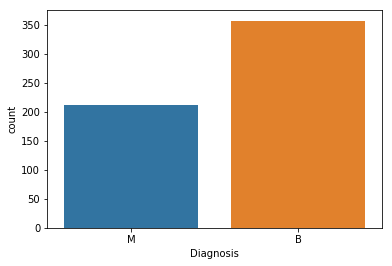

In [16]:
sns.countplot(df['Diagnosis'], label = 'Count')

In [21]:
df.head()

,ID_number,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,largest_radius,largest_texture,largest_perimeter,largest_area,largest_smoothness,largest_compactness,largest_concavity,largest_concave points,largest_symmetry,largest_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
features['Diagnosis'] = df.Diagnosis.map(lambda x: 0 if x=='B' else 1)

In [23]:
features = df.drop(columns= ['ID_number'], axis=1)

In [24]:
df.head()

,ID_number,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,largest_radius,largest_texture,largest_perimeter,largest_area,largest_smoothness,largest_compactness,largest_concavity,largest_concave points,largest_symmetry,largest_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


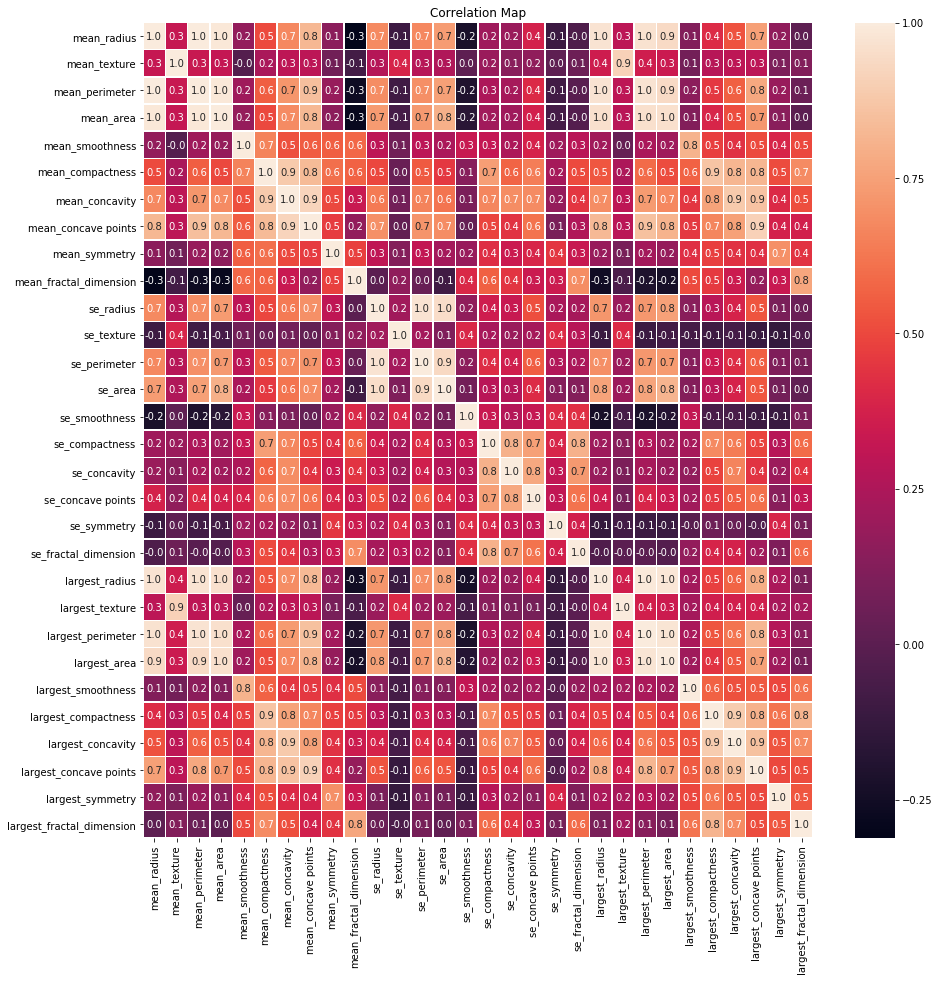

In [25]:
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(features.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

We can see the five features'mean_concave points', 'largest_concave points', 'largest_perimeter', 'mean_compactness', 'se_area' have strong coorelation with Diagnosis and I am taking these features to build my model.

In [26]:
df_features = df[['mean_concave points', 'largest_concave points', 'largest_perimeter', 'mean_compactness', 'se_perimeter']]

In [27]:
#Let us normalize the features
df_normal = (df_features - df_features.min())/ (df_features.max()- df_features.min())
display(df_normal.head(1))

,mean_concave points,largest_concave points,largest_perimeter,mean_compactness,se_perimeter
0,0.731113,0.912027,0.66831,0.792037,0.369034


In [28]:
X = df_normal
Y = df['Diagnosis']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lrm = LogisticRegression(C = 1e9, penalty = 'l2')
lrm_model = lrm.fit(X_train, y_train)

print('Logistic Regression coefficients')
print(lrm_model.coef_)
print(lrm_model.intercept_)
y_pred = lrm.predict(X_train)
print('Logistic Regression Percentage Accuracy', lrm.score(X_train, y_train))
print('Logistic Regression Accuracy', pd.crosstab(y_pred, y_train))
Cross_validation = cross_val_score(lrm, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score', (Cross_validation))
print('Logistic Regression Cross Validation Score:{:.3f}(+/- {:.2f})'.format(Cross_validation.mean(), Cross_validation.std()*2))
                                                                            
Conf_matrix = confusion_matrix(y_train, y_pred)        
 
sns.heatmap(conf_matrix,
           cmap= 'coolwarm_r',
           annot = True,
           Linewidths = 0.5
)
plt.title('Confusion matrix on training data for Random forest model')
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.show()

Logistic Regression coefficients
[[ 8.38439593 13.78477095 23.14178251 -8.99183818 22.87921772]]
[-14.31865728]
Logistic Regression Percentage Accuracy 0.949748743718593
Logistic Regression Accuracy Diagnosis    B    M
row_0              
B          238   11
M            9  140
Logistic Regression Cross Validation Score [0.95061728 0.9375     0.94936709 0.91139241 0.94936709]
Logistic Regression Cross Validation Score:0.940(+/- 0.03)


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

NameError: name 'conf_matrix' is not defined

[[ 17.39134566  19.62629164  27.00326975  -7.96807084 -15.19473768]]
[-17.98056533]
Logistic Regression Accuracy score on test set: 0.9649122807017544
Logistic Regression Cross Validation Score: [0.85714286 0.97058824 0.91176471 0.94117647 0.91176471]
Logistic Regression Confusion matrix


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

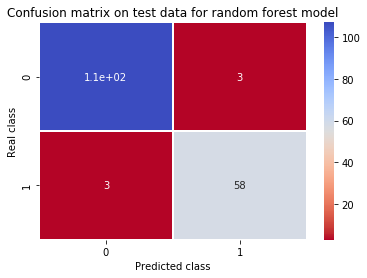

In [31]:
#For test data

lrm = LogisticRegression(C= 1e9, penalty = 'l2')
lrm_model = lrm.fit(X_test, y_test)

print(lrm_model.coef_)
print(lrm_model.intercept_)
lrm_pred = lrm.predict(X_test)


print('Logistic Regression Accuracy score on test set:', lrm.score(X_test, y_test))
Cross_validation = cross_val_score(lrm, X_test, y_test, cv=5)
print('Logistic Regression Cross Validation Score:', (Cross_validation))

conf_matrix = confusion_matrix(y_test, lrm_pred)
print('Logistic Regression Confusion matrix')
sns.heatmap(conf_matrix,
            cmap = 'coolwarm_r',
            annot = True,
            Linewidths =0.5
)
plt.title('Confusion matrix on test data for random forest model')
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.show()
      

Decision Tree 

Decision tree Accuracy: 0.8869346733668342


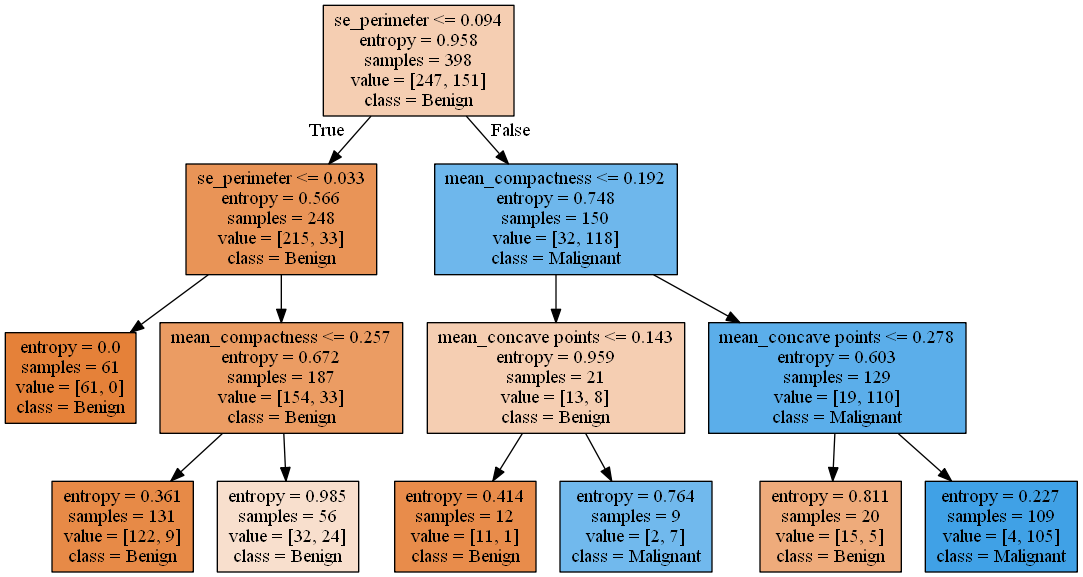

In [32]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#A convenience for displaying image
from IPython.display import Image

#Import packages for rendering our tree 
import pydotplus
import graphviz
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features= 1,
    max_depth = 3,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)
decision_tree_score = decision_tree.score(X_train, y_train)
print('Decision tree Accuracy:',(decision_tree_score))
#Render our tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names = df_normal.columns,
    class_names  =['Benign', 'Malignant'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


Random Forest Classifier

In [33]:
#Fit our model (Training set)
rfc = ensemble.RandomForestClassifier(n_jobs = 3)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_train)
print('Random Forest Accuracy percentage:', rfc.score(X_train, y_train))

Cross_validation =cross_val_score(rfc, X_train, y_train, cv=5)
print('Random Forest Cross Validation Score:', (Cross_validation))

print('Random forest Accuracy', pd.crosstab(rfc_pred, y_train))

C:\Users\18644\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy percentage: 0.9949748743718593
Random Forest Cross Validation Score: [0.92592593 0.9625     0.92405063 0.96202532 0.96202532]
Random forest Accuracy Diagnosis    B    M
row_0              
B          246    1
M            1  150


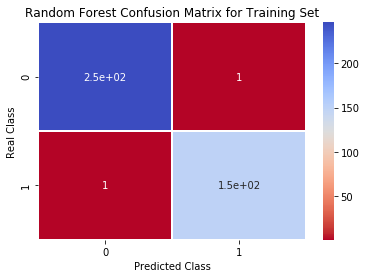

In [34]:
confusion_mat_rfm = confusion_matrix(y_train, rfc_pred )

sns.heatmap(confusion_mat_rfm, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Random Forest Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

C:\Users\18644\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score of test data: 0.9883040935672515
Random forest Accuracy Diagnosis    B   M
row_0             
B          109   1
M            1  60
Random Forest Cross Validation Score: [0.88571429 1.         0.91176471 0.94117647 0.91176471]


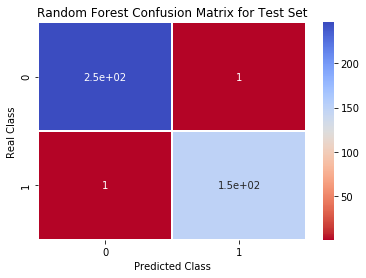

In [35]:
#Accuracy score in test set
rfc = ensemble.RandomForestClassifier(n_jobs = 3)
rfc.fit(X_test, y_test)
rfc_pred = rfc.predict(X_test)


print('Accuracy Score of test data:', rfc.score(X_test, y_test))
print('Random forest Accuracy', pd.crosstab(rfc_pred, y_test))

Cross_validation =cross_val_score(rfc, X_test, y_test, cv=5)
print('Random Forest Cross Validation Score:', (Cross_validation))


confusion_mat_rfc = confusion_matrix(y_test, rfc_pred )
conf_matrix_rfc = (y_test, rfc_pred)
sns.heatmap(confusion_mat_rfm, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Random Forest Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()
